#### Problem Statement
BoomBikes-A US bike sharing provider has suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.As the company wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1.Which variables are significant in predicting the demand for shared bikes.
2.How well those variables describe the bike demands.

#### Business Goal
1.Develop a model to find variables with signigicant the demand for shared bikes with the available independent variables.

2.It will be used by the management to understand how exactly the demands vary with different features and accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

3.Also the model will be a good way for management to understand the demand dynamics of a new market. 

###### Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

###### Loading Dataset

In [2]:
#reading dataset using pandas

bikesharing_df= pd.read_csv('day.csv')
bikesharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


###### Understanding Data

In [3]:
bikesharing_df.shape  #number of rows and columns

(730, 16)

In [4]:
#check for type of data and count of data in dataset
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#size of data
bikesharing_df.size

11680

In [6]:
#describe statistical information
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### Data Preprocessing and Cleaning
Check for Unique values and null values
Drop Columns that aren't useful for EDA

In [7]:
#unique values 
bikesharing_df.apply(lambda x: len(x.unique()))
#also by bikesharing_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
#check for null values
bikesharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bikesharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
#dropping instant column as this column has no significance for our target
bikesharing_df.drop(['instant'],axis=1,inplace=True)
bikesharing_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [11]:
#dteday is not useful as month and weekday can replace it
bikesharing_df.drop(['dteday'],axis=1,inplace=True)
bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [12]:
#Removing casual and registered as target variable cnt describes cnt= casual + registered
bikesharing_df.drop(['casual'],axis=1,inplace=True)
bikesharing_df.drop(['registered'],axis=1,inplace=True)
bikesharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
bikesharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
bikesharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
bikesharing_df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [17]:
bikesharing_df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

###### EDA

In [18]:
bikesharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


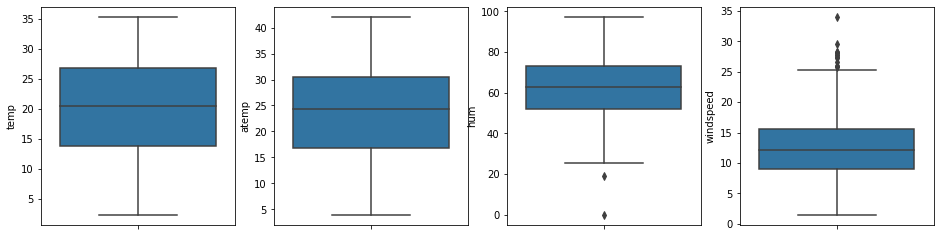

In [19]:
#Draw boxplots for independent vars with ontinuous values to see outliers

cols= ['temp','atemp','hum','windspeed']
plt.figure(figsize=(16,4))
i=1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col,data=bikesharing_df)
    i+=1
    

from above plots we can see no outliers to be handled .

In [20]:
#converting numerical data season,mnth,weekday,weathersit to meaningful categorical type

bikesharing_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)


In [21]:
bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [22]:

bikesharing_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace= True)

bikesharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
bikesharing_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace= True)
bikesharing_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,moderate,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,moderate,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,moderate,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,good,10.489153,11.58500,48.3333,23.500518,1796


drawing pairplot to understand correlation and linear relationship

<Figure size 1296x2160 with 0 Axes>

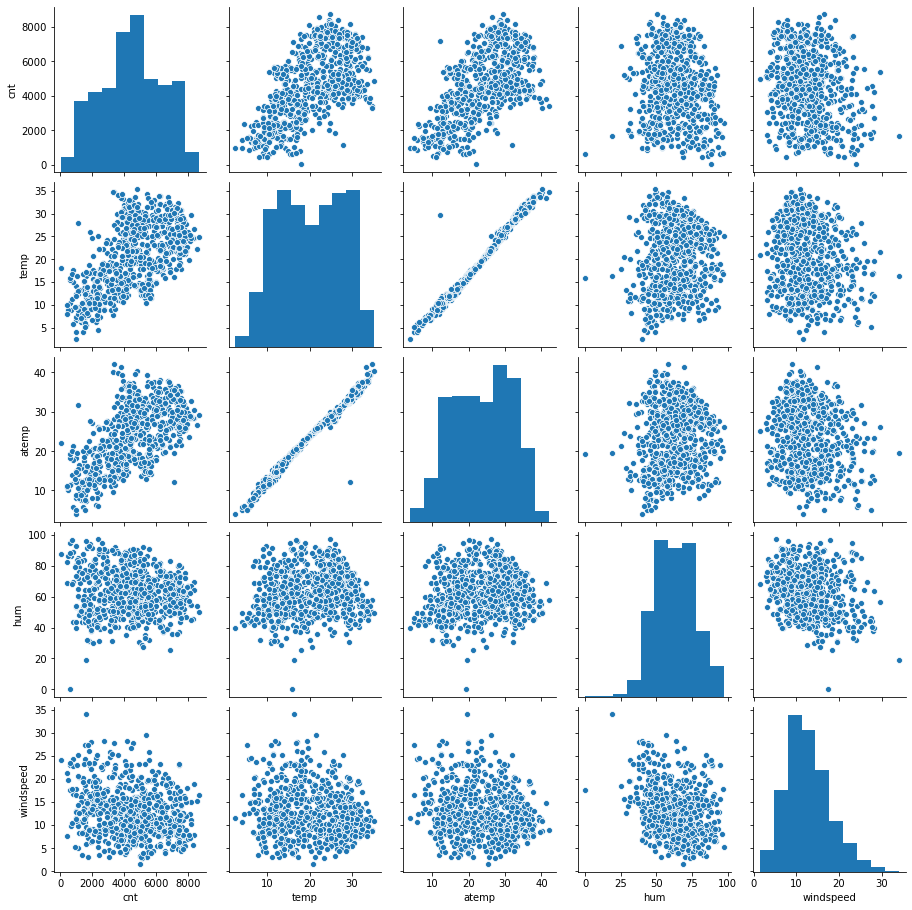

In [24]:
plt.figure(figsize=(18,30))
sns.pairplot(data=bikesharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

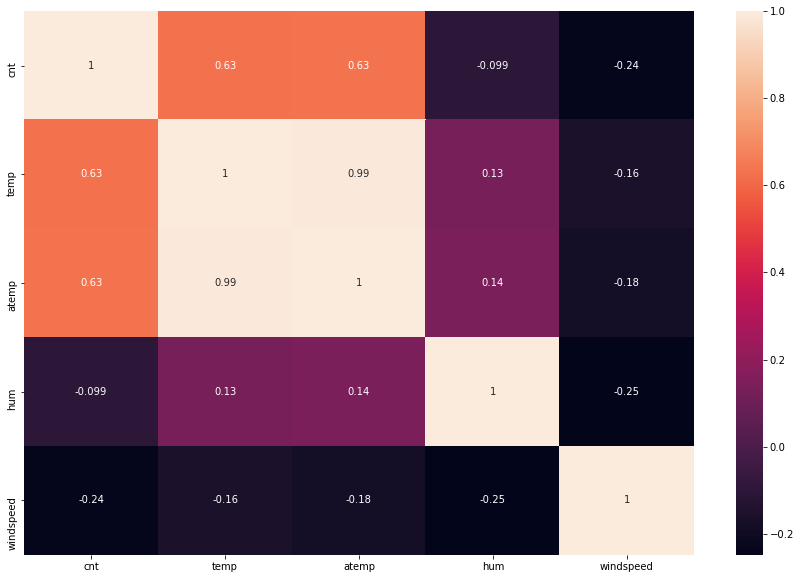

In [25]:
# Checking continuous variables relationship with each other
plt.figure(figsize=(15,10))
sns.heatmap(bikesharing_df[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(), annot = True)
plt.show()

From above plots we can see :
1.target variable cnt shares highest correlation with temp and atemp
2.temp and atemp are highly correlated to each other.
3.target variable cnt shares linear relationship with temp and atemp.

<Figure size 1440x1080 with 0 Axes>

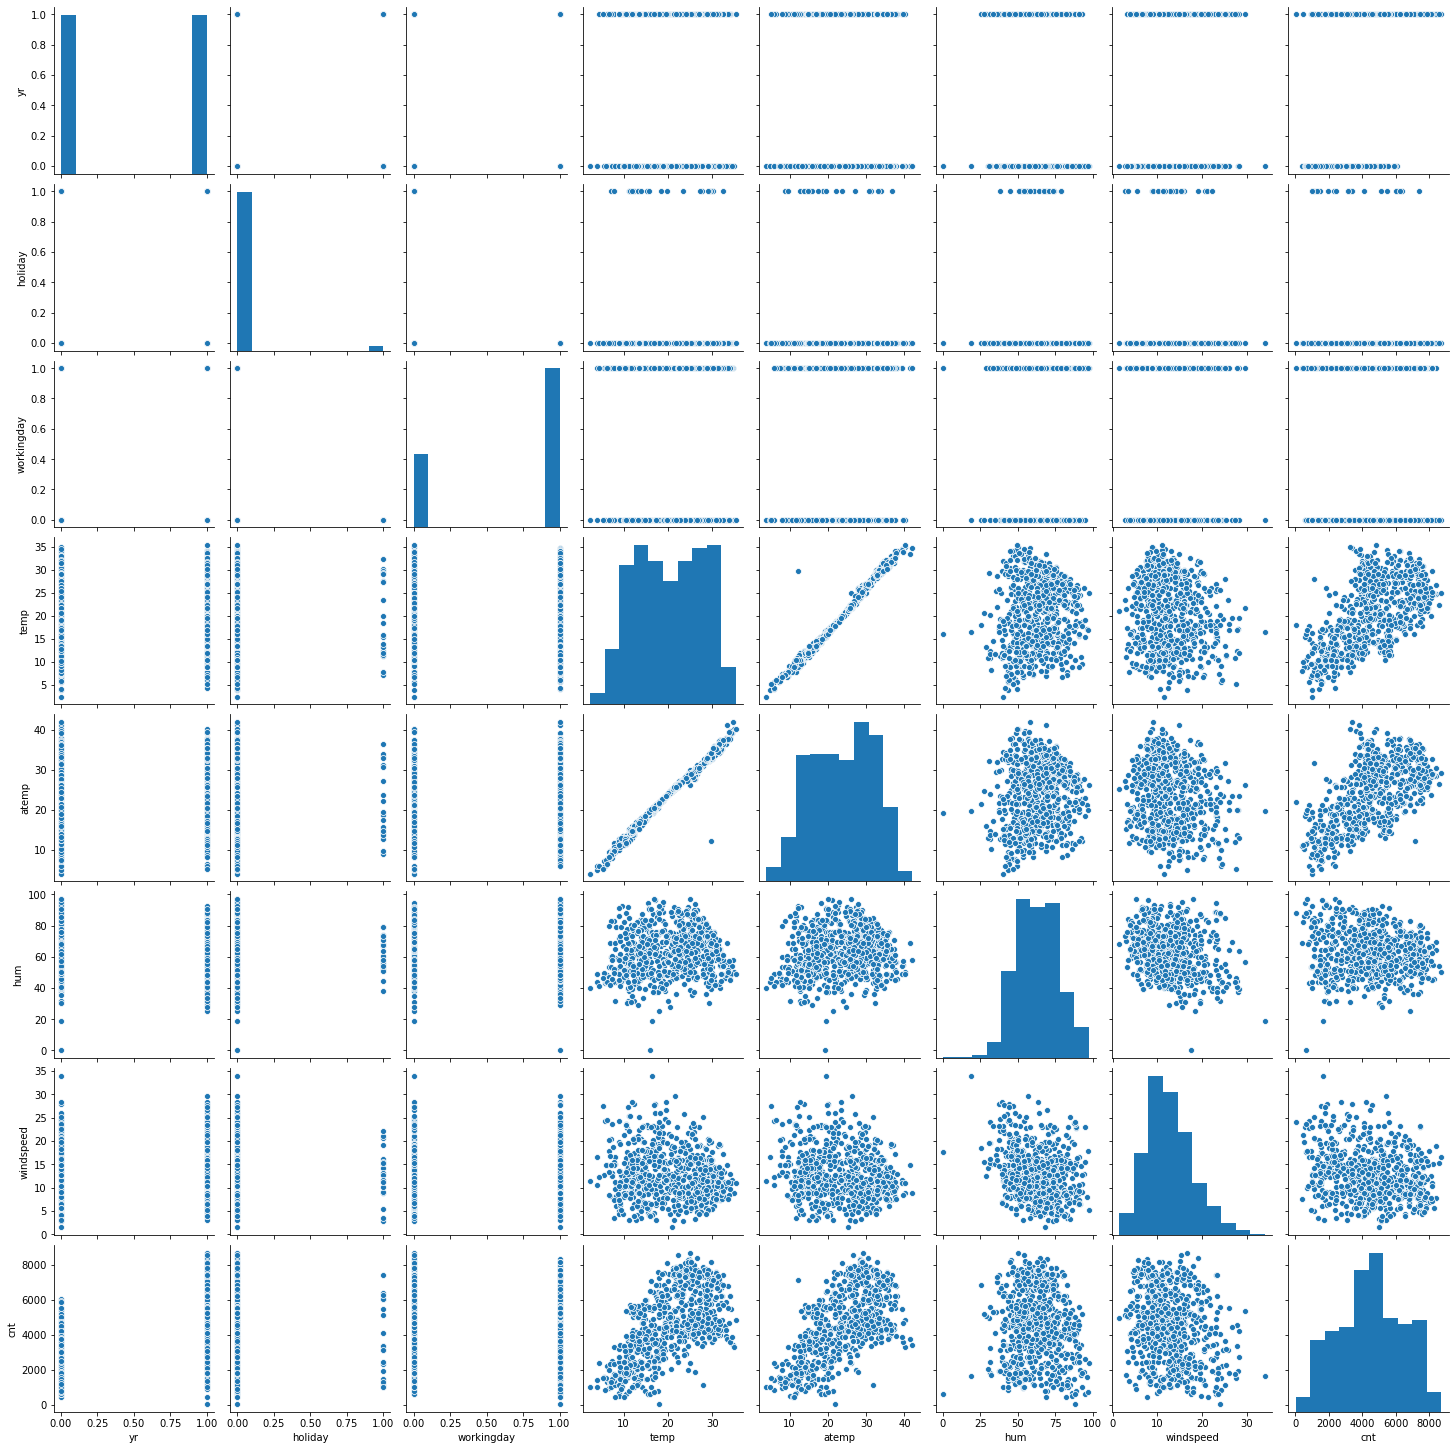

In [26]:
#Plots to visualize correlation between numerical variables
plt.figure(figsize=(20,15))
sns.pairplot(bikesharing_df)
plt.show()

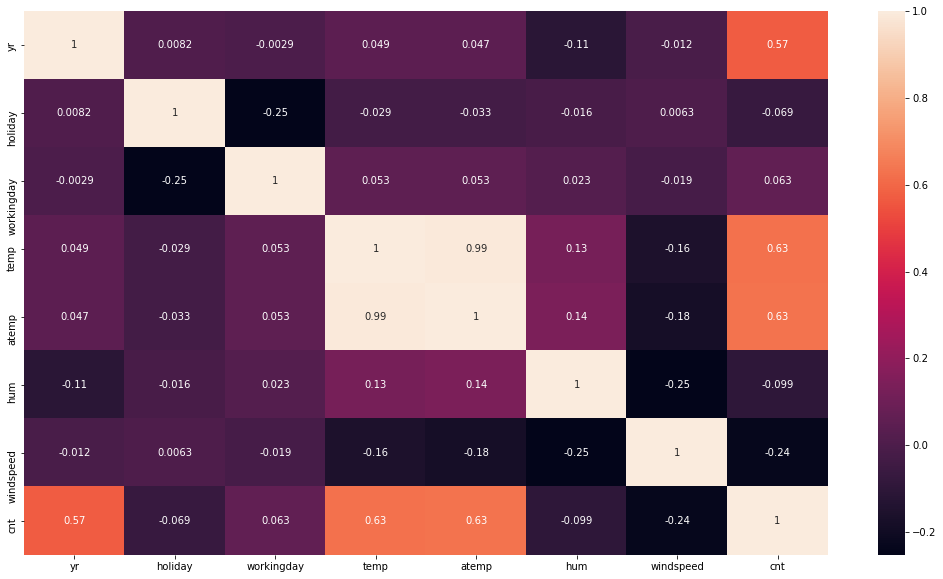

In [27]:
#heatmap to visualize correlation between numerical variables
plt.figure(figsize=(18,10))
sns.heatmap(bikesharing_df.corr(),annot=True)
plt.show()

From above heatmap we can see target variable cnt shares good correlation and linear relationshiop with some independent variable which is a good sign to build linear regression model.

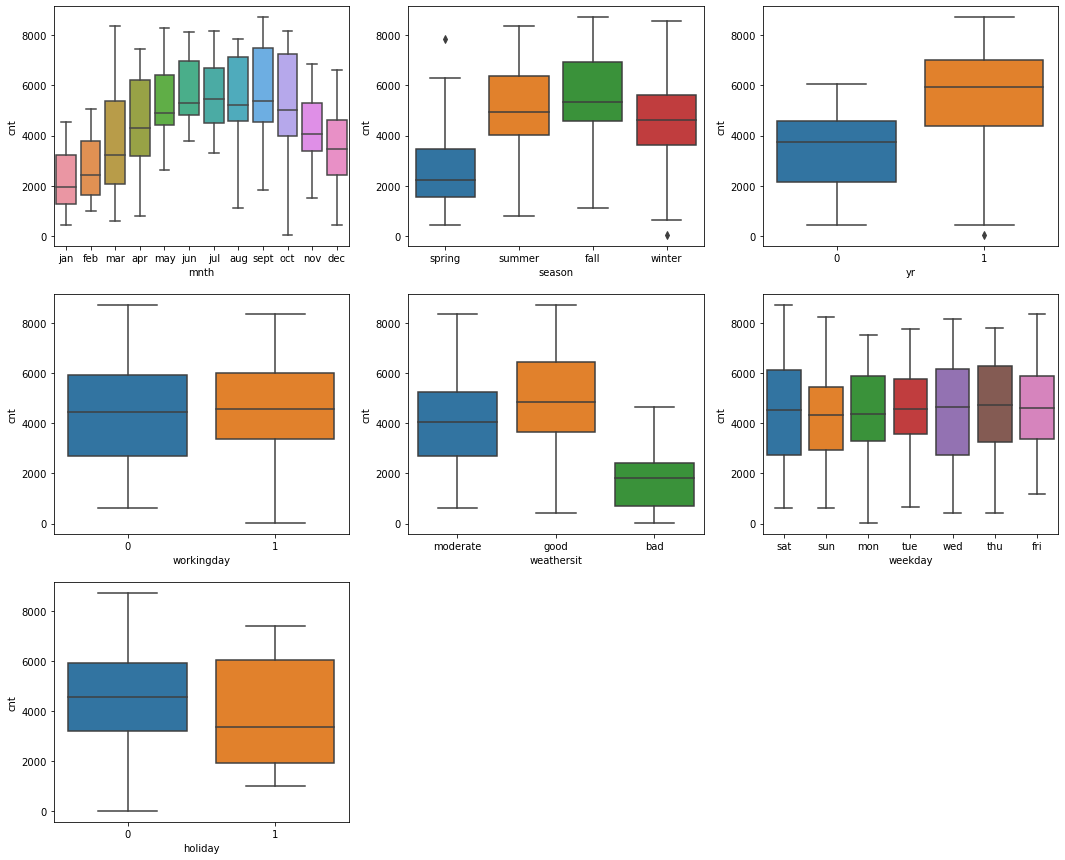

In [28]:
#visualising the categorical variables using box plot to see demands

plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
sns.boxplot(x='mnth',y='cnt',data=bikesharing_df)

plt.subplot(3,3,2)
sns.boxplot(x='season',y='cnt',data=bikesharing_df)

plt.subplot(3,3,3)
sns.boxplot(x='yr',y='cnt',data=bikesharing_df)


plt.subplot(3,3,4)
sns.boxplot(x='workingday',y='cnt',data=bikesharing_df)

plt.subplot(3,3,5)
sns.boxplot(x='weathersit',y='cnt',data=bikesharing_df)

plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=bikesharing_df)


plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=bikesharing_df)

From above plots we found:
1.highest demand /cnt of bike sharing is highest during month of september and lowest in January and in december.
2.During fall season bike sharing count is high and spring is least.
3.During year 1/2019 has more bike sharing than previous year 2018.
4.During working days demand is more
5.demand is more during good weather and lowest in bad.
6.During weekdays , Saturday has most bike sharing and sunday has lowest but not much differences.
7.holiday demand is less.

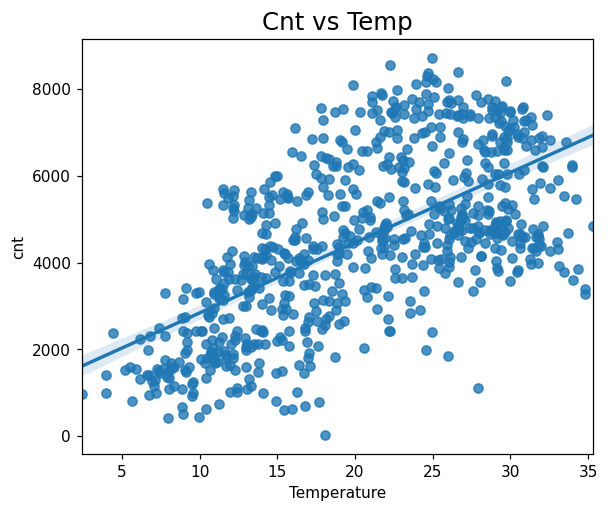

In [29]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikesharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

from above regression plot we can see demands/cnt increases as temperature increases and hence +vely correlated.

###### Data Preparation for Linear Regression 

Create Dummy variable

In [30]:
bikesharing_df = pd.get_dummies(data=bikesharing_df,columns=["season","mnth","weekday"],drop_first=True)
#dropping first column (p-1)
bikesharing_df.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [31]:
bikesharing_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,moderate,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
bikesharing_df = pd.get_dummies(data=bikesharing_df,columns=["weathersit"])
#not dropping first column weathersit_bad from the weather information

In [33]:
#Print columns after creating dummies
bikesharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [34]:
bikesharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


###### Model Building

Divide data into train and test data 70:30

In [35]:
bikesharing_df.shape

(730, 31)

In [36]:
# Importing required library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [37]:
y=bikesharing_df.pop('cnt')   #y contains target variable

X=bikesharing_df             #X contains all other independent variables


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [40]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [41]:
#Scaling: feature scaling is mandatory step for linear regression models in order to bring all features to same scale  
#before scaling checking the features of X_train

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,13.188347,16.22460,62.0417,10.250129,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
645,1,1,0,15.716653,19.38040,70.9583,12.708493,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
163,0,0,1,26.035000,30.08270,49.4583,20.458450,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
640,1,0,1,26.957500,29.95665,79.3750,4.458569,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [42]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,20.550310,24.009242,63.482145,12.598001,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,7.476797,8.112525,13.939855,4.965253,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.079626,17.407600,52.848700,9.041918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.354153,25.410200,64.041700,11.791732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.940423,30.556050,73.458300,15.583496,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,28.250014,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# scaling continuous variables temp,atemp,hum,windspeed

scaler_vars= ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()

#fit and transform X_train set

X_train[scaler_vars]= scaler.fit_transform(X_train[scaler_vars])

#Only transform X_test set
X_test[scaler_vars] = scaler.transform(X_test[scaler_vars])



In [44]:
#let's check X_train set after scaling the variables
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [45]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.283105,0.237443,0.228311,0.109589,0.109589,0.082192,0.077626,0.068493,0.077626,0.136986,0.068493,0.059361,0.073059,0.063927,0.132420,0.127854,0.123288,0.132420,0.168950,0.141553,0.027397,0.657534,0.315068
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.451539,0.426491,0.420705,0.313092,0.313092,0.275286,0.268194,0.253169,0.268194,0.344621,0.253169,0.236840,0.260830,0.245183,0.339723,0.334692,0.329520,0.339723,0.375566,0.349389,0.163612,0.475622,0.465607
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


Model Building using RFE(Automated) and Manual Elimination

In [48]:
lr= LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [49]:
#selcting 15 features using RFE

rfe=RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [50]:
#column selected by RFE approach and their weights
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 16),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [51]:
#Function to build model using statsmodel api- Takes the columns to be selected for model as a parameter
def build_model(col):
    X_train_sm= sm.add_constant(X_train[col])
    lm=sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

In [52]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [53]:
#Columns selected by RFE.Then for manual elimination of columns rfe.support_=1
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [54]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [55]:
# Taking 15 columns supported by RFE for regression

X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]
X_train_rfe.shape

(511, 15)

###### Model 1:

In [56]:
#Selected all columns  for Model 1 
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          4.52e-183
Time:                        15:49:18   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

R square:.836 .variables not satisfying condition p value < 0.05 i.e. mnth_jan is very high p value and -ve coeffient,low VIF,Also next holiday has high p vaue , -ve coeeficient and low VIF. But we will dropping one variable at a time and see the result and compare          

###### Model 2

In [57]:
#dropping mnth_jan

cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.59e-184
Time:                        15:49:18   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

R squared = .836
variable holiday has high p value 0.079 > 0.05 and -ve coefficient 

###### Model 3 

In [58]:
#Drooping  holiday

cols = ['yr','workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.18e-184
Time:                        15:49:18   Log-Likelihood:                -4132.8
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2293.2320    

R square .835
hum -ve coefficient 

###### Model 4 

In [59]:
#dropping hum variable
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          4.56e-182
Time:                        15:49:18   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

R squared =.829
variable mnth_jul has high p value > 0.05           

###### Model 5

In [60]:
#dropping variable mnth_jul

cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.57e-182
Time:                        15:49:18   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

###### Model 6

In [61]:

#Remove windspeed for -ve coefficient
cols = ['yr', 'workingday', 'temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)

get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.11e-180
Time:                        15:49:18   Log-Likelihood:                -4150.6
No. Observations:                 511   AIC:                             8323.
Df Residuals:                     500   BIC:                             8370.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 991.0039    

###### Model 7

In [62]:
#remove temp

cols = ['yr', 'workingday','season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)

get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          5.13e-147
Time:                        15:49:18   Log-Likelihood:                -4232.8
No. Observations:                 511   AIC:                             8486.
Df Residuals:                     501   BIC:                             8528.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4212.2384    

###### Model 8

In [63]:

#replace weekday_sat to weekday_sun which was not selected from the beggining during RFE  and adding back temp

cols = ['yr', 'temp','workingday','season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)

get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          5.65e-179
Time:                        15:49:18   Log-Likelihood:                -4154.6
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     500   BIC:                             8378.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1352.9317    

###### Model 9

In [64]:
#removing temp

cols = ['yr', 'workingday','season_spring','windspeed',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)

get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     161.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.78e-149
Time:                        15:49:18   Log-Likelihood:                -4224.8
No. Observations:                 511   AIC:                             8472.
Df Residuals:                     500   BIC:                             8518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4936.1181    

###### Model 10

In [65]:
#remove workingday and season_summer and adding back temp

cols = ['yr', 'temp','season_spring','season_winter', 
        'mnth_jul','mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']


build_model(cols)

get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.33e-179
Time:                        15:49:19   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

From above P values are less tha 0.05 and VIF values are <=5 and R square value is quite good too 0.819.
difference between R2 and adjusted R2 is very less which means no additional parameters that can be removed from th model 10.


In [66]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [67]:
#Build the final model using sklearn using final model var 

cols = ['yr', 'temp','season_spring','season_winter', 
        'mnth_jul','mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1849.311114143622 [ 2001.88568746  3917.73381585 -1170.12801426   494.76805882
  -482.89359595   483.00061976  -335.8335287  -2305.32363933
  -665.38449026]


###### Model Evalution

In [68]:
#Residual analysis

y_train_pred = lr.predict(X_train[cols])

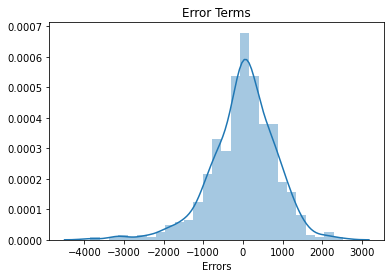

In [69]:
#Plot a histogram of the error terms
#function defination
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

    
#plotting
plot_res_dist(y_train, y_train_pred)

Errors are normally distributed with mean 0.

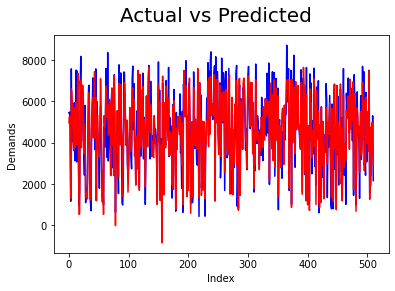

In [70]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 20)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

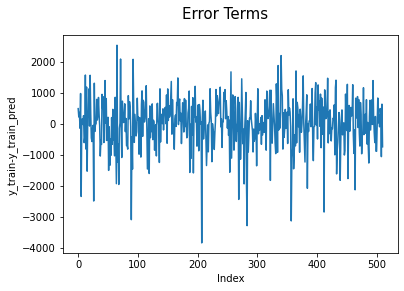

In [71]:
# Error Terms : y_train-y_train_pred

c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

So error terms graph pattern is similar as actual and predicted pattern.So model is good to go with.

In [72]:
#R squared value for trained prediction
r2_score(y_train,y_train_pred)

0.8185359364498817

R squared value for train prediction is ~= R squared from final model 10.

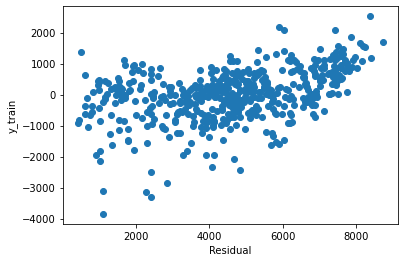

In [73]:
# scatter plot for the check for linearity
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

###### Prdict values for test data

Previously Already transformed for X_test data set for scaler_vars= ['temp','atemp','hum','windspeed']

#Only transform X_test set
X_test[scaler_vars] = scaler.transform(X_test[scaler_vars])

And for predicting test data for columns from final Model10

In [74]:
#cols = ['yr','season_spring', 'mnth_jul',
#        'season_winter', 'mnth_sept', 'weekday_sun',
#       'weathersit_bad', 'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

In [75]:
r2_score(y_test,y_test_pred)

0.8159036088393238

###### Inference:
  Homoscedacity-
  R squared value for traine dataset = 0.818 and for test dataset found out to be 0.815.
  So this model is showing good prediction for test data.

    Let's see the error terms is normally distributed and pattern of for test dataset and predicted data

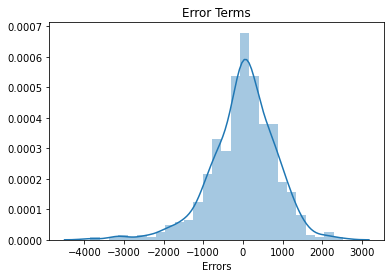

In [76]:
#plottinf error term for test dataset
plot_res_dist(y_train, y_train_pred)

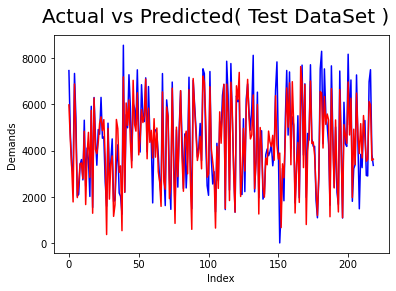

In [77]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted( Test DataSet )', fontsize = 20)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Text(0, 0.5, 'y_test_pred')

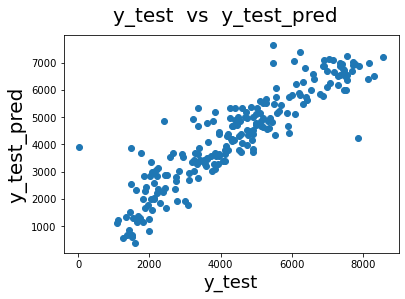

In [78]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test  vs  y_test_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 20)

So from above graph we found the error terms for test data follows the normal distribution with mean as 0 same as train dataset.
Also actual data and predicted test data pattern are same as train data set.
linearity between y_test and y_test_predicted shows that model is good.

###### Analysis

Significant variables to predict demands to increase and  take business desicions are:

1.Year 2019
2.temp
3.weathersit
4.Humidity
5.Holiday
6.windspeed
7.Sunday
8.Month
9.Season

Suggestions :
1.Company should focus on expanding business during spring as demands are less.
2.During weathersit , summer/fall, and month from May to october the demands is good , so company should focus on maximizing business to cover up the situations where demands are less.
3.During less demand period Bike can used for servicing.